In [18]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from utils.datautils import *

In [7]:
Dataset_name = "KentuckyUPS"
dataset_path_ = "../UCRArchive_2018/"
normalize_dataset = True
Xtrain_raw, ytrain_raw, Xval_raw, yval_raw, Xtest_raw, ytest_raw = Readdataset(dataset_path_, Dataset_name)
Xtrain, Xval, Xtest = Multi_view(Xtrain_raw, Xval_raw, Xtest_raw)

In [11]:
Xtrain.shape[1]/3

754.0

In [12]:
Xtrain.shape

(150, 2262)

In [27]:
random_row_index = np.random.randint(0,150)
print(random_row_index)

24


In [28]:
sample_row = Xtrain[random_row_index]

In [29]:
sample_row.shape

(2262,)

In [30]:
sample_row = sample_row[0:754]

In [31]:
sample_row.shape

(754,)

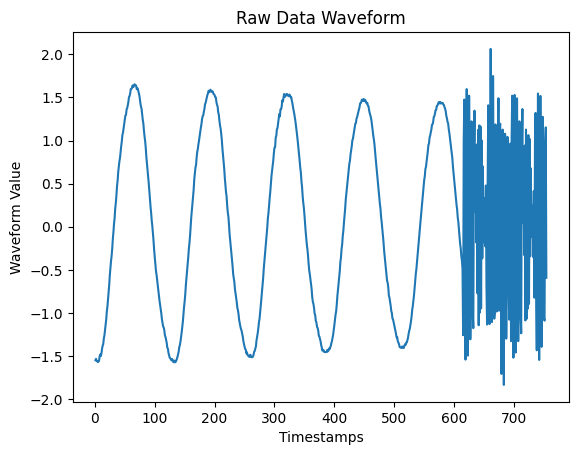

In [32]:
x = np.arange(1,755)
sns.lineplot(x = x, y = sample_row)
plt.xlabel("Timestamps")
plt.ylabel("Waveform Value")
plt.title("Raw Data Waveform")
plt.show()

In [2]:
df= pd.read_csv("../UCRArchive_2018/KentuckyUPS/KentuckyUPS_TRAIN.tsv", sep = '\t', header = None)
print(df.shape)

(150, 615)


In [40]:
dataset_labels = {"Coffee": {0: "Robusta", 1: "Arabica"},
                  "ItalyPowerDemand": {1: "Oct to March", 2: "April to Sept"},
                  "KentuckyUPS": {1: "Sub-Cycle Disturbance", 2: "Sag", 3: "Healthy"}}

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_row_from_data(dataset_name, data_type = "raw", row_index = 0):
    df = pd.read_csv(f"../UCRArchive_2018/{dataset_name}/{dataset_name}_TRAIN.tsv", sep = '\t', header = None)
    X_train = df.iloc[:, 1:].values
    y_train = df.iloc[:, 0].values
    # random_row_index = np.random.randint(0, X_train.shape[0])
    sample_row = X_train[row_index]
    if(data_type == "fft"):
        X_fft = np.fft.fft(X_train, axis=1)
        X_fft = np.abs(X_fft)  # Take the magnitude of the FFT
        sample_row = X_fft[row_index]
    if(data_type == "dif"):
        X_dif = X_train[:, 1:] - X_train[:, :-1]  # Compute the difference between consecutive points
        X_dif = np.concatenate((X_dif[:,0].reshape([-1,1]), X_dif), 1) 
        sample_row = X_dif[row_index]
    
    x = np.arange(0, sample_row.shape[0])
    sns.lineplot(x=x, y=sample_row)
    plt.xlabel("Timestamps")
    if data_type == "raw":
        plt.ylabel("Waveform Value")
    elif data_type == "fft":
        plt.ylabel("FFT")
    elif data_type == "dif":
        plt.ylabel("Derivative")
    plt.title(f"{dataset_name} - {dataset_labels[dataset_name][y_train[row_index]]}: {data_type.capitalize()} Data")
    plt.text(0.95, 0.95, f"Index: {row_index}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    # plt.show()
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\E0819920\\NSTSC\\Codes\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

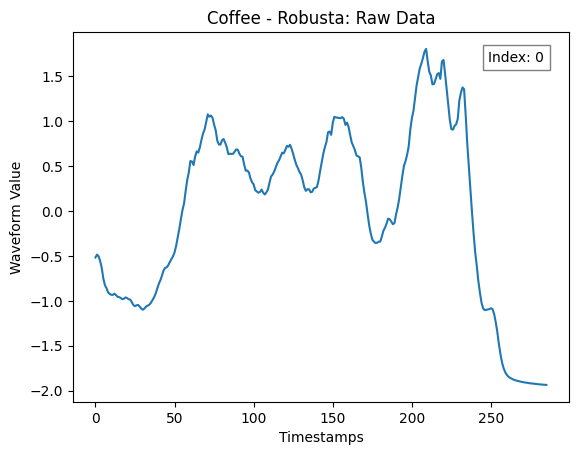

In [31]:
plot_row_from_data("Coffee")

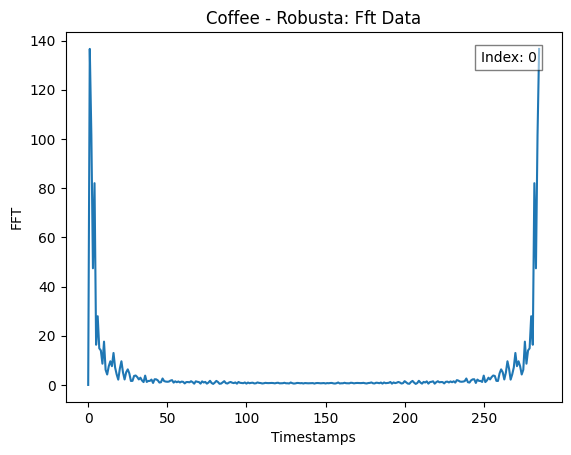

In [ ]:
plot_row_from_data("Coffee", "fft")

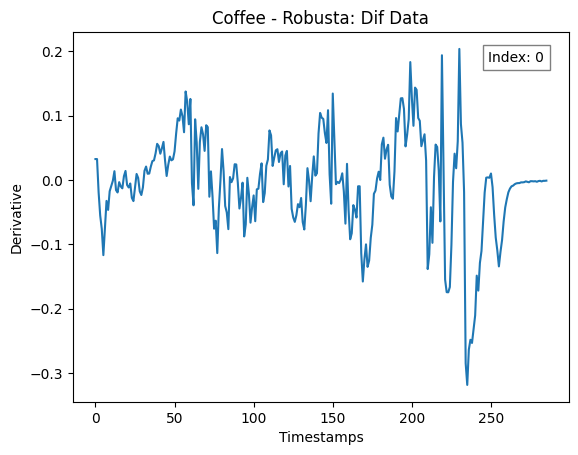

In [ ]:
plot_row_from_data("Coffee", "dif")

In [3]:
from utils.datautils import Readdataset
def plot_standard_data(dataset_name, data_type = "raw", row_index = 0):
    Xtrain, ytrain, Xval, yval, Xtest, ytest = Readdataset("../UCRArchive_2018/", dataset_name)
    T = Xtrain.shape[1] // 3
    Xraw = Xtrain[:, :T]
    Xfft = Xtrain[:, T:2*T]
    Xdif = Xtrain[:, 2*T:]
    if data_type == "raw":
        sample_row = Xraw[row_index]
    elif data_type == "fft":
        sample_row = Xfft[row_index]
    elif data_type == "dif":
        sample_row = Xdif[row_index]
    x = np.arange(0, sample_row.shape[0])
    sns.lineplot(x=x, y=sample_row)
    plt.xlabel("Timestamps")
    if data_type == "raw":
        plt.ylabel("Waveform Value")
    elif data_type == "fft":
        plt.ylabel("FFT")
    elif data_type == "dif":
        plt.ylabel("Derivative")
    plt.title(f"{dataset_name} - {dataset_labels[dataset_name][ytrain[row_index]]}: {data_type.capitalize()} Data")
    plt.text(0.95, 0.95, f"Index: {row_index}", horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    # plt.show()
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\E0819920\\NSTSC\\Codes\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

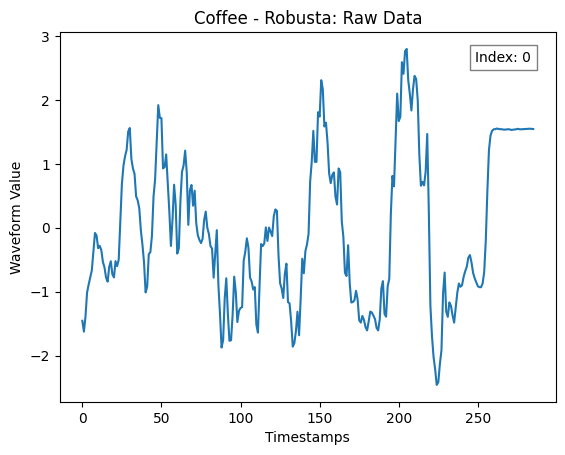

In [33]:
plot_standard_data("Coffee")

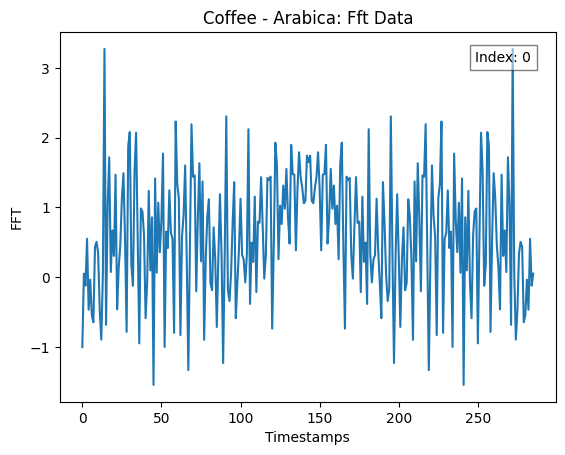

In [28]:
plot_standard_data("Coffee", "fft")

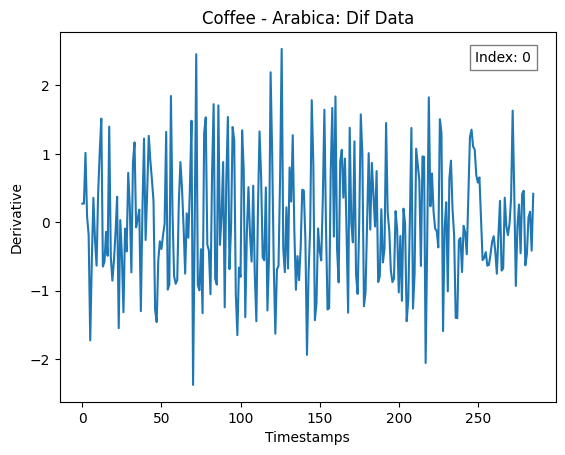

In [29]:
plot_standard_data("Coffee", "dif")

In [57]:
from sklearn.preprocessing import StandardScaler
def Readdataset(dataset_path_, Dataset_name, standalize=True, val=False, shuffle = True):
    # print("Running Readdataset")
    """
    @brief Load and preprocess dataset from the given path.
    @param dataset_path_: Path to the dataset directory.
    @param Dataset_name: Name of the dataset.
    @param standalize: Whether to standardize the data.
    @param val: Whether to split validation from test set.
    @return Xtrain, ytrain, Xval, yval, Xtest, ytest
    """
    
    Dataset_folder = dataset_path_ + Dataset_name + '/'
    Xtrain = pd.read_csv(Dataset_folder + Dataset_name + '_TRAIN.tsv', header=None, sep='\t').values
    Xtest = pd.read_csv(Dataset_folder + Dataset_name + '_TEST.tsv', header=None, sep='\t').values
    ytrain = Xtrain[:,0]
    ytest = Xtest[:,0]
    Xtrain = Xtrain[:,1:]
    Xtest = Xtest[:,1:]
    if shuffle:
        Xtrain, ytrain = Shuffle(Xtrain, ytrain)
        Xtest, ytest = Shuffle(Xtest, ytest)

    #fixing the data leakage issue, commented the earlier approach of standardizing data below
    Xtrain_fft = np.fft.fft(Xtrain)
    Xtrain_fft = np.abs(Xtrain_fft)
    Xtrain_dif = Xtrain[:,1:] - Xtrain[:,:-1]
    Xtrain_dif = np.concatenate((Xtrain_dif[:,0].reshape([-1,1]),Xtrain_dif),1)
    Xtrain = np.concatenate((Xtrain, Xtrain_fft, Xtrain_dif),1)
    Xtest_fft = np.fft.fft(Xtest)
    Xtest_fft = np.abs(Xtest_fft)
    Xtest_dif = Xtest[:,1:] - Xtest[:,:-1]
    Xtest_dif = np.concatenate((Xtest_dif[:,0].reshape([-1,1]),Xtest_dif),1)
    Xtest = np.concatenate((Xtest, Xtest_fft, Xtest_dif),1)
    
    ss = StandardScaler()
    if standalize:
        Xtrain = ss.fit_transform(Xtrain)
        Xtest = ss.transform(Xtest)


    Ntrain = Xtrain.shape[0]
    Xall, yall = np.concatenate((Xtrain, Xtest)), np.concatenate((ytrain, ytest))
        
    yset = np.array(list(set(yall))).astype(int)
    classnum = len(yset)    
    for ci in range(classnum):
        yall[yall == yset[ci]] = ci
    
    # ss = StandardScaler()
    # if standalize:
    #     Xall = ss.fit_transform(Xall)
        
    # Xall_fft = np.fft.fft(Xall)
    # Xall_fft = np.abs(Xall_fft)
    # Xall_dif = Xall[:,1:] - Xall[:,:-1]
    # Xall_dif = np.concatenate((Xall_dif[:,0].reshape([-1,1]),Xall_dif),1)
    # Xall = np.concatenate((Xall, Xall_fft, Xall_dif),1)
    # if standalize:
    #     Xall = ss.fit_transform(Xall)
    Xtrain, Xtest = Xall[:Ntrain,:], Xall[Ntrain:,:] 
    ytrain, ytest = yall[:Ntrain,], yall[Ntrain:,]
    
    if val:
        Ntest = Xtest.shape[0]
        Nval = int(Ntest * 0.5)
        Xval, yval = Xtest[:Nval, :], ytest[:Nval,]
        Xtest, ytest = Xtest[Nval:, :], ytest[Nval:,]
    else:
        Xval = Xtest - 0
        yval = ytest - 0
    
    return Xtrain, ytrain, Xval, yval, Xtest, ytest

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
def plot_data_comparison(dataset_name, row_index=0):
    # Create a 2x3 subplot figure
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=[
            f"Raw - Original", f"Raw - FFT", f"Raw - Derivative",
            f"Standardized - Original", f"Standardized - FFT", f"Standardized - Derivative"
        ],
        vertical_spacing=0.15,
        horizontal_spacing=0.05
    )
    
    # Get raw data
    df = pd.read_csv(f"../UCRArchive_2018/{dataset_name}/{dataset_name}_TRAIN.tsv", sep='\t', header=None)
    X_train = df.iloc[:, 1:].values
    y_train = df.iloc[:, 0].values
    
    # Get standardized data
    Xtrain, ytrain, _, _, _, _ = Readdataset("../UCRArchive_2018/", dataset_name, standalize=True, val=False, shuffle = False)
    T = Xtrain.shape[1] // 3
    Xraw = Xtrain[:, :T]
    Xfft = Xtrain[:, T:2*T]
    Xdif = Xtrain[:, 2*T:]
    
    # Class label
    class_label = dataset_labels[dataset_name][y_train[row_index]] if dataset_name in dataset_labels else f"Class {y_train[row_index]}"
    
    # RAW DATA ROW
    # Original raw data
    sample_raw = X_train[row_index]
    x_raw = np.arange(0, len(sample_raw))
    fig.add_trace(
        go.Scatter(x=x_raw, y=sample_raw, name="Raw", line=dict(color="blue")),
        row=1, col=1
    )
    
    # FFT of raw data
    X_fft = np.abs(np.fft.fft(X_train, axis=1))
    sample_fft = X_fft[row_index]
    fig.add_trace(
        go.Scatter(x=x_raw, y=sample_fft, name="Raw FFT", line=dict(color="blue")),
        row=1, col=2
    )
    
    # Derivative of raw data
    X_dif = X_train[:,1:] - X_train[:,:-1]
    X_dif = np.concatenate((X_dif[:,0].reshape([-1,1]),X_dif),1)
    # X_dif = np.diff(X_train, axis=1, prepend=X_train[:, 0].reshape(-1, 1))
    sample_dif = X_dif[row_index]
    fig.add_trace(
        go.Scatter(x=x_raw, y=sample_dif, name="Raw Derivative", line=dict(color="blue")),
        row=1, col=3
    )
    
    # STANDARDIZED DATA ROW
    # Standardized original data
    sample_std = Xraw[row_index]
    x_std = np.arange(0, len(sample_std))
    fig.add_trace(
        go.Scatter(x=x_std, y=sample_std, name="Standardized", line=dict(color="red")),
        row=2, col=1
    )
    
    # Standardized FFT
    sample_std_fft = Xfft[row_index]
    fig.add_trace(
        go.Scatter(x=x_std, y=sample_std_fft, name="Standardized FFT", line=dict(color="red")),
        row=2, col=2
    )
    
    # Standardized derivative
    sample_std_dif = Xdif[row_index]
    fig.add_trace(
        go.Scatter(x=x_std, y=sample_std_dif, name="Standardized Derivative", line=dict(color="red")),
        row=2, col=3
    )
    
    # Update layout and axis labels
    fig.update_layout(
        title_text=f"{dataset_name} - {class_label} (Sample Index: {row_index})",
        height=1500,
        width=3500,
        showlegend=True,
        legend=dict(orientation="h", yanchor="bottom", y=-0.15, xanchor="center", x=0.5)
    )
    
    # Update x-axis titles
    for i in range(1, 3):
        for j in range(1, 4):
            x_title = "Timestamps"
            if j == 2:
                x_title = "Timestamps"
            fig.update_xaxes(title_text=x_title, row=i, col=j)
    
    # Update y-axis titles
    fig.update_yaxes(title_text="Raw Waveform Value", row=1, col=1)
    fig.update_yaxes(title_text="Raw FFT Value", row=1, col=2)
    fig.update_yaxes(title_text="Raw Differences", row=1, col=3)
    fig.update_yaxes(title_text="Standardised Waveform Value", row=2, col=1)
    fig.update_yaxes(title_text="Standardised FFT Values", row=2, col=2)
    fig.update_yaxes(title_text="Standardised Differences", row=2, col=3)
    
    return fig

In [62]:
# First, make sure to install plotly if you haven't already
# !pip install plotly

# Import plotly
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'colab' if using Google Colab

# Plot data for Coffee dataset, sample index 0
row_index = 10
dataset_name = "ItalyPowerDemand"
fig = plot_data_comparison(dataset_name, row_index)
# fig.show()
fig.write_html(f"../Plotly_plots/{dataset_name}/{dataset_name}TRAIN_{row_index}.html")
# You can try different datasets or samples
# fig = plot_data_comparison("ItalyPowerDemand", row_index=1)
# fig.show()